# Getting the US Dollar exchange rate reports

The first step is to get the US Dollar exchange rate reporst that happens throwout the day. There are three types of reports
- Abertura(opening)
- Intermediary(Intermediário)
- Closing(Fechamento)

We are getting the dataset from the API: [Banco Central do Brasil Dollar API](https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/aplicacao#!/)



In [1]:
import requests
import numpy
import matplotlib.pyplot as plot

from pandas.io.json import json_normalize

request = requests.get("https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoMoedaPeriodo(moeda=@moeda,dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@moeda='USD'&@dataInicial='12-31-2018'&@dataFinalCotacao='05-23-2019'&$format=json&$select=cotacaoCompra,dataHoraCotacao,tipoBoletim")

dolarRatesJson = request.json()

dolarRates = json_normalize(dolarRatesJson['value'])

dolarRates.tail(20)

,cotacaoCompra,dataHoraCotacao,tipoBoletim
471,4.0911,2019-05-20 10:05:21.68,Abertura
472,4.1007,2019-05-20 11:03:21.226,Intermediário
473,4.1184,2019-05-20 12:10:20.505,Intermediário
474,4.1098,2019-05-20 13:11:37.023,Intermediário
475,4.1050,2019-05-20 13:11:37.033,Fechamento
476,4.1025,2019-05-21 10:02:26.774,Abertura
477,4.0825,2019-05-21 11:06:19.204,Intermediário
478,4.0677,2019-05-21 12:10:21.339,Intermediário
479,4.0687,2019-05-21 13:02:43.116,Intermediário
480,4.0804,2019-05-21 13:02:43.126,Fechamento


# Translatting the dataframe to english

Simply translatting the portuguese words to english.

In [2]:
dolarRates.columns = ['USD_QUOTATION', 'TIMESTAMP', 'REPORT_TYPE']
dolarRates = dolarRates.replace('Abertura', 'OPENING')
dolarRates = dolarRates.replace('Intermediário', 'INTERMEDIARY')
dolarRates = dolarRates.replace('Fechamento', 'CLOSING')

dolarRates.tail(20)

,USD_QUOTATION,TIMESTAMP,REPORT_TYPE
471,4.0911,2019-05-20 10:05:21.68,OPENING
472,4.1007,2019-05-20 11:03:21.226,INTERMEDIARY
473,4.1184,2019-05-20 12:10:20.505,INTERMEDIARY
474,4.1098,2019-05-20 13:11:37.023,INTERMEDIARY
475,4.1050,2019-05-20 13:11:37.033,CLOSING
476,4.1025,2019-05-21 10:02:26.774,OPENING
477,4.0825,2019-05-21 11:06:19.204,INTERMEDIARY
478,4.0677,2019-05-21 12:10:21.339,INTERMEDIARY
479,4.0687,2019-05-21 13:02:43.116,INTERMEDIARY
480,4.0804,2019-05-21 13:02:43.126,CLOSING


# Categorizing US Dollar ratings

Now we are categorizing each rating, giving them one of three classes:

1. "UP" - If the USD_QUOTATION is greater than the previous value
2. "STEADY"- If the USD_QUOTATION is equal to the previous value
3. "DOWN" - If the USD_QUOTATION is smaller than the previous value

In [3]:
dolarRates['VARIATION'] = numpy.where(dolarRates['USD_QUOTATION'].diff() > 0, 'UP', 
                          numpy.where(dolarRates['USD_QUOTATION'].diff() < 0, 'DOWN', 'STEADY'))

dolarRates.tail(20)

,USD_QUOTATION,TIMESTAMP,REPORT_TYPE,VARIATION
471,4.0911,2019-05-20 10:05:21.68,OPENING,UP
472,4.1007,2019-05-20 11:03:21.226,INTERMEDIARY,UP
473,4.1184,2019-05-20 12:10:20.505,INTERMEDIARY,UP
474,4.1098,2019-05-20 13:11:37.023,INTERMEDIARY,DOWN
475,4.1050,2019-05-20 13:11:37.033,CLOSING,DOWN
476,4.1025,2019-05-21 10:02:26.774,OPENING,DOWN
477,4.0825,2019-05-21 11:06:19.204,INTERMEDIARY,DOWN
478,4.0677,2019-05-21 12:10:21.339,INTERMEDIARY,DOWN
479,4.0687,2019-05-21 13:02:43.116,INTERMEDIARY,UP
480,4.0804,2019-05-21 13:02:43.126,CLOSING,UP


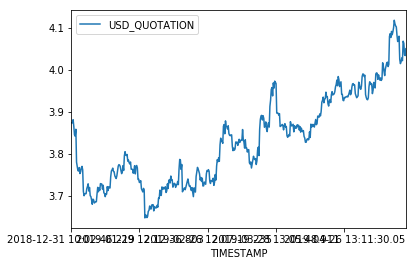

In [6]:
dolarRates.plot(kind='line',x='TIMESTAMP',y='USD_QUOTATION')

plot.show()